<a href="https://colab.research.google.com/github/OleguerGabernet/ML_HW3_Fraud_Detection/blob/master/Fraud_detection_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fraud detection


1. Explore de datasets / visualize data
2. Decide which features are important
3. Perform Machine Learning
4. Test model on the test set.


In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [19]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()
print(len(df))

284807


In [20]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


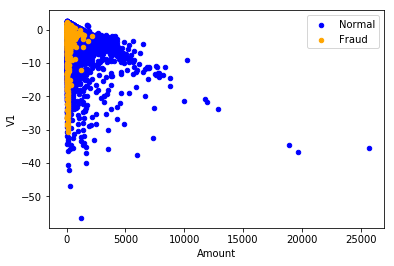

In [29]:

ax = non_frauds.plot.scatter(x='Amount', y='V1', color = 'Blue', label = 'Normal')
fraud.plot.scatter(x='Amount', y='V1', color = 'Orange', label = 'Fraud', ax=ax )

In [0]:
#Machine Learning
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [26]:
x = df.iloc[:, :-1]
y = df['Class']


def normalize(x):  #Normalize the features is proven to improve Precision and recall
  for feature in x.columns:
        x[feature] -= x[feature].mean()
        x[feature] /= x[feature].std()
  return x


  
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.35)


#X_train = normalize(X_train)
#X_test = normalize(X_test)

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)

y_pred = logistic.predict(X_test)

#print('Score:', logistic.score(X_test, y_test))

print(classification_report(y_test, y_pred))



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99519
           1       0.84      0.65      0.73       164

    accuracy                           1.00     99683
   macro avg       0.92      0.82      0.87     99683
weighted avg       1.00      1.00      1.00     99683

